In [1]:
import input_pipeline
import MyKeras
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical


2023-03-16 22:56:54.659473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 22:56:54.726022: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-16 22:56:55.144388: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/extras/CUPTI/lib64:/home/tsou/Desktop/ICME2023/.conda/lib/
2023-03-16 

In [2]:
image_shape = (288, 512,3)
data_path = '/home/tsou/Desktop/ICME2023/iVS-ODSEG-Dataset'
train_gen = input_pipeline.get_generators(batch_size=1, dataset_path=data_path,image_shape=image_shape,real_world=True)

/home/tsou/Desktop/ICME2023/iVS-ODSEG-Dataset/labels_real_world/*.png
train: 130 -> 130


In [3]:
model, epoch = MyKeras.load_latest_model('models/main')

loaded: /home/tsou/Desktop/ICME2023/models/main/model.01.h5


2023-03-16 22:56:56.049873: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 22:56:56.053229: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 22:56:56.053315: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 22:56:56.053595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

2023-03-16 22:56:57.728055: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


1/1 [==============================] - 2s 2s/step
[[[[0.18285507 0.15586239 0.16160546 0.17038687 0.16922046 0.16006969]
   [0.18376449 0.15656026 0.16061485 0.16986589 0.16709436 0.1621001 ]
   [0.1882456  0.15586285 0.158158   0.17048384 0.16404139 0.16320823]
   ...
   [0.18348525 0.15479295 0.16023006 0.1697314  0.16911396 0.1626464 ]
   [0.18522133 0.15450822 0.15910071 0.17011285 0.1678297  0.16322716]
   [0.18255296 0.15509091 0.16058517 0.16964637 0.16959913 0.1625254 ]]

  [[0.18458658 0.15825854 0.16045806 0.1687858  0.16808143 0.15982965]
   [0.18461004 0.16048059 0.1599112  0.16890891 0.16621064 0.15987866]
   [0.18302174 0.16187204 0.1630701  0.16740999 0.1674212  0.15720497]
   ...
   [0.18295634 0.15707332 0.15985118 0.16912967 0.16903093 0.1619585 ]
   [0.1840108  0.15690412 0.16076608 0.168201   0.16871424 0.16140378]
   [0.18292132 0.15677112 0.15959165 0.16855194 0.16873434 0.16342965]]

  [[0.18656075 0.15943119 0.16004486 0.1698839  0.16534352 0.15873575]
   [0.183

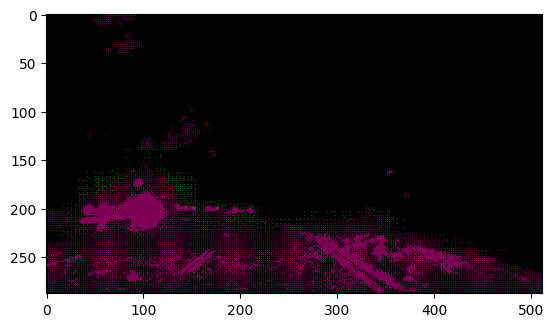

In [4]:
i = 500
for x, y in train_gen:
    i+=1
    y_hat = model.predict(x)
    print(y_hat)
    
    y_hat = np.argmax(y_hat, axis=-1)
    tmp = to_categorical(y_hat, 6)[0]
    ch1 = ((tmp[:,:,0])*0+(tmp[:,:,1])*1+(tmp[:,:,2])*0+(tmp[:,:,3])*1+(tmp[:,:,4])*0+(tmp[:,:,5])*0)/2*255
    ch2 = ((tmp[:,:,0])*0+(tmp[:,:,1])*0+(tmp[:,:,2])*1+(tmp[:,:,3])*0+(tmp[:,:,4])*1+(tmp[:,:,5])*0)/2*255
    ch3 = ((tmp[:,:,0])*0+(tmp[:,:,1])*1+(tmp[:,:,2])*1+(tmp[:,:,3])*0+(tmp[:,:,4])*0+(tmp[:,:,5])*1)/3*255
    image = np.transpose([ch1,ch2,ch3], (1,2,0)).astype(np.uint8)
    # y_hat = np.array(to_categorical(y_hat, 6)[0] * 255.0).astype(np.uint8)
    y_hat = image
    # y_hat[:,:,0] = 0

    # plt.imshow(np.array(x[0]*255.0 + y_hat).astype(np.uint8))
    plt.imshow(np.array(y_hat).astype(np.uint8))
    # plt.imsave('predict_result/real_world1/'+str(i)+'.png',np.array(x[0]*255.0 + y_hat/2.0).astype(np.uint8))
    plt.show()
    break